In [20]:
library(tidyverse)

options(repr.plot.width  = 8,
        repr.plot.height = 5)
bold.14.text <- element_text(face = "bold", size = 14)

# Central Limit Theorem

Given a dateset with an unknown distribution, the distribution of the sample means will approximate a normal distribution.

So we have one sample from a larger population.  That sample is not normally distributed.  But the distribution of all of the (theoretical) sample means from that population trends towards normality.

Why does this matter?  We need to assume a normal distribution for (parametric) hypothesis testing and constructing Confidence Intervals.  Even if the distribution of our one sample is not normal we can assume that the distribution of the means from all of the (hypothetical) samples trend towards normality.

## Step One - Create a Population of Random Numbers
I'm going to create a population of 10,000 dice rolls.  Because there is an equal probability of rolling each number, this distribution is the uniform distribution.

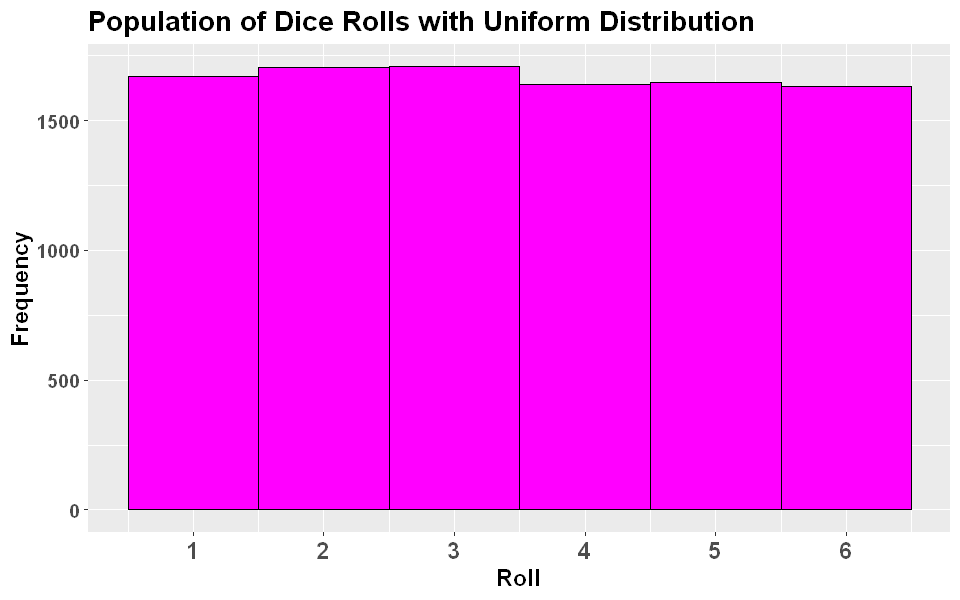

In [21]:
x <- sample(1:6, 10000, replace = T)
df <- data.frame(rolls = x)

ggplot(df, aes(x = rolls)) + 
    geom_histogram(color = "black", fill="magenta", bins = 6) +
    labs(x = "Roll", y = "Frequency", title = "Population of Dice Rolls with Uniform Distribution") +
    scale_x_continuous(breaks=1:6) +
    theme(axis.text.x = bold.14.text, 
                      text = bold.14.text)

## Step Two: Select a Sample from the Population
I'm going to now select a sample of 100 dice rolls from our population of 10,000 dice rolls.

[1] "The mean of the sample is 3.52"

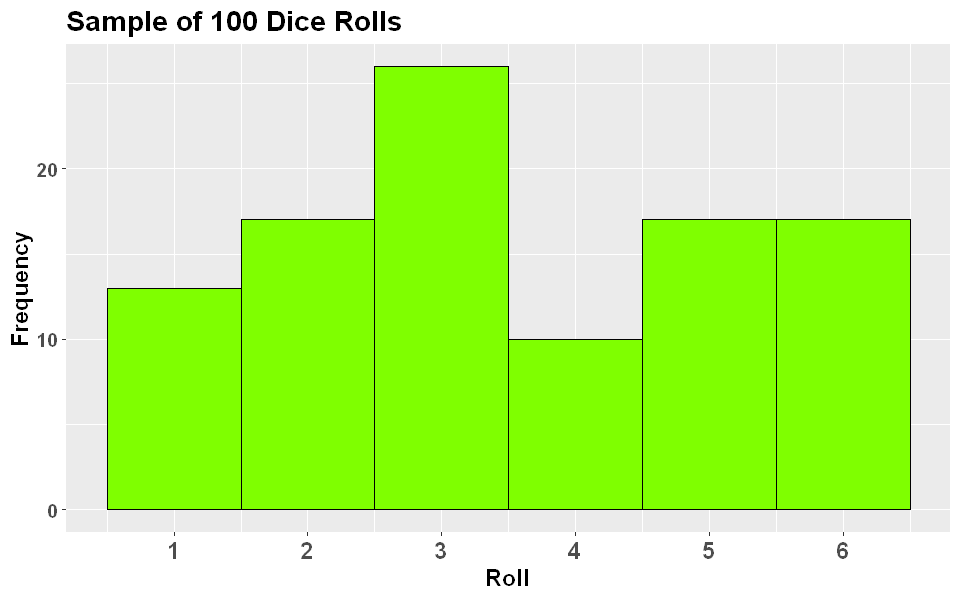

In [22]:
sample <- data.frame(samp_rolls = sample(x,100,replace = TRUE))
ggplot(sample, aes(x = samp_rolls)) + geom_histogram(fill="chartreuse", color = "black", bins = 6) +
    labs(x = "Roll", y = "Frequency", title = "Sample of 100 Dice Rolls") +
    scale_x_continuous(breaks=1:6)+
    theme(axis.text.x = bold.14.text, 
                      text = bold.14.text)

paste0("The mean of the sample is ", mean(sample$samp_rolls))

This sample is clearly not normal, but what happens if we take 100 samples and plot the **means** of those samples?

How does it change as our sample sizes get larger?

## Step Three:  Select multiple samples and plot the distribution of the MEANS

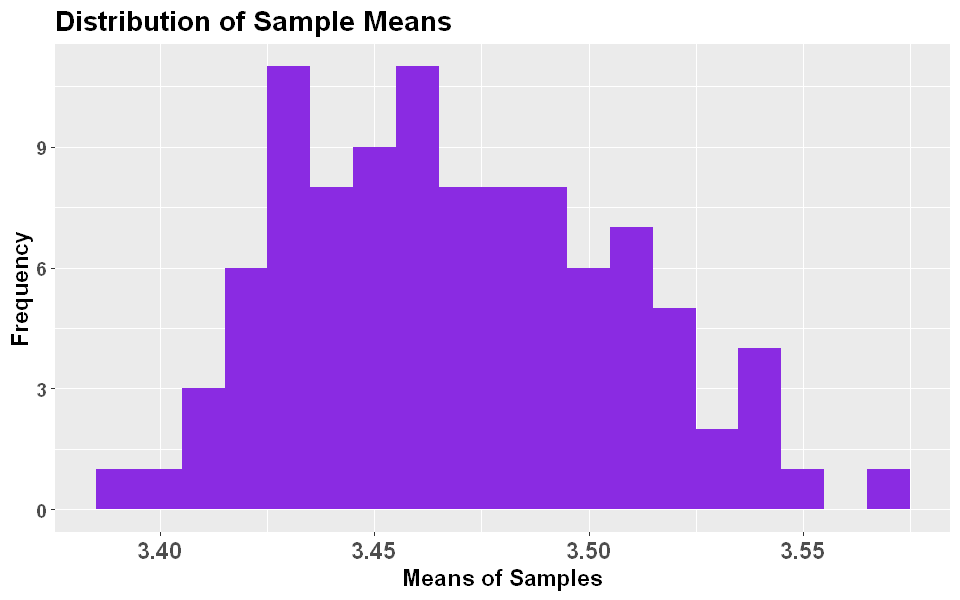

In [28]:
# define an empty object to save means
meanrolls <- NULL

# set our desired sample size
sample_size <- 2000

# create 100 samples
for (n in 1:100){
  meanrolls <- rbind(meanrolls, mean(sample(x, sample_size, replace = TRUE)))
}
meandf <- data.frame(means = meanrolls)

#PLOT HISTOGRAM - FREQUENCY OF EACH MEAN OF THE SAMPLES
ggplot(meandf, aes(x = means)) + 
    geom_histogram(fill="blueviolet", binwidth = .01) +
    labs(x = "Means of Samples", y = "Frequency", title = "Distribution of Sample Means")+
    theme(axis.text.x = bold.14.text, 
                      text = bold.14.text)


## QQ Plot - Determining Normality

A Quantile-Quantile Plot (QQ Plot) plots our sample distribution against a theoretical normal distribution.  If the points line up in a straight 45 degree line our sample distribution is normal.  Any places where the dots don't line up on the line indicate deviation from normality in our sample distribution.

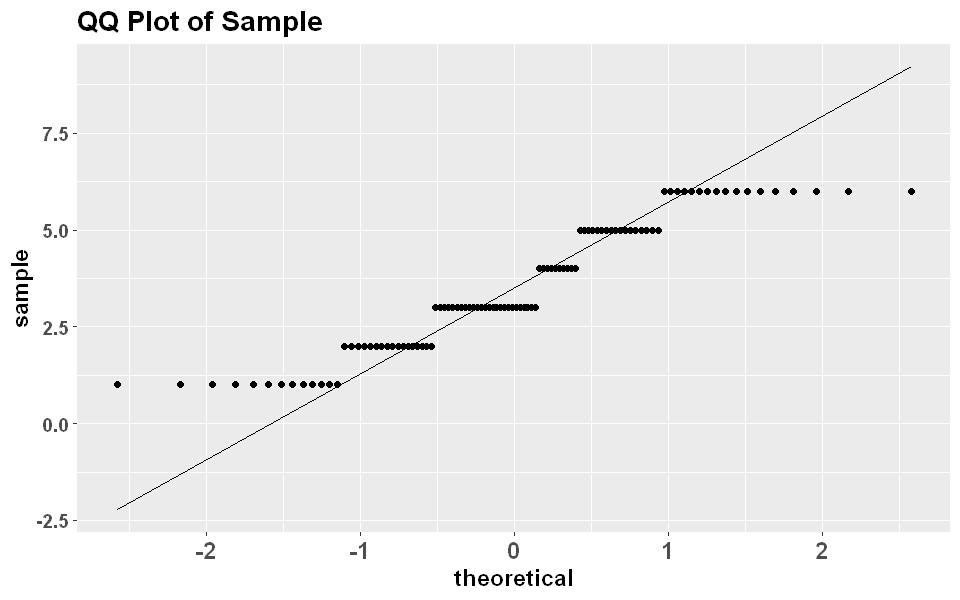

In [29]:
## FIRST, QQ Plot of Sample

ggplot(sample, aes(sample = samp_rolls)) +
  stat_qq() +
  stat_qq_line() +
  labs (title = "QQ Plot of Sample")+
    theme(axis.text.x = bold.14.text, 
                      text = bold.14.text)

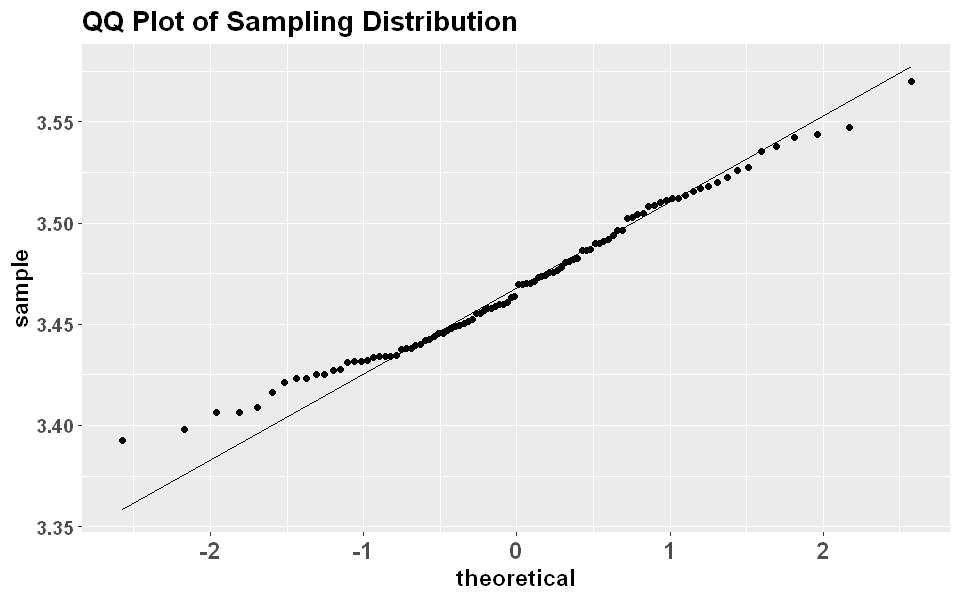

In [30]:
## QQ Plot of Sample Means - The SAMPLING Distribution

ggplot(meandf, aes(sample= means)) +
  geom_qq() +
  geom_qq_line() +
  labs(title = "QQ Plot of Sampling Distribution")+
    theme(axis.text.x = bold.14.text, 
                      text = bold.14.text)